In [93]:
import astropy.io.fits as fits
import matplotlib.pyplot as plt
import astropy.units as u
import numpy as np
import pandas as pd
from astropy.table import Table
from astropy.modeling.models import Voigt1D
from astropy.modeling import fitting
import seaborn as sns
from lmfit import Model, Parameters
from scipy.ndimage import gaussian_filter

In [78]:
def wavelength_edges(wavelength_data):
    diff = np.diff(wavelength_data)
    diff0 = np.concatenate((np.array([diff[0]]), diff)) 
    diff1 = np.concatenate((diff, np.array([diff[-1]]))) 
    w0 = wavelength_data - diff0/2.
    w1 = wavelength_data + diff1/2.

    return w0, w1

In [89]:
# Define a fitting function that returns the model's values
def voigt_fit(x, **params):
    num_peaks = params.pop('num_peaks')
    y = np.zeros_like(x)
    for i in range(num_peaks):
        amplitude = params[f'amplitude_{i}']
        x_0 = params[f'x_0_{i}']
        fwhm_L = params[f'fwhm_L_{i}']
        fwhm_G = params[f'fwhm_G_{i}']
        voigt_model.amplitude_L = amplitude
        voigt_model.x_0 = x_0
        voigt_model.fwhm_L = fwhm_L
        voigt_model.fwhm_G = fwhm_G
        y += voigt_model(x)
    return y

In [79]:
# Define a fitting function that returns the model's values
def single_voigt_fit(x, amplitude, x_0, fwhm_L, fwhm_G):
    voigt_model.amplitude_L = amplitude
    voigt_model.x_0 = x_0
    voigt_model.fwhm_L = fwhm_L
    voigt_model.fwhm_G = fwhm_G
    return voigt_model(x)

In [94]:
def smooth_data(wavelength_data, flux_data, error_data, sigma):
    # Smooth data
    smoothed_wavelength = gaussian_filter(wavelength_data, sigma)
    smoothed_flux = gaussian_filter(flux_data, sigma)
    smoothed_error = gaussian_filter(error_data, sigma)

    return smoothed_wavelength, smoothed_flux, smoothed_error

In [101]:
hd_palette = sns.color_palette(palette='flare')
hd_palette

[(0.9155979, 0.55210684, 0.42070204),
 (0.888292, 0.40830288, 0.36223756),
 (0.81942908, 0.28911553, 0.38102921),
 (0.69226314, 0.23413578, 0.42480327),
 (0.56041794, 0.19845221, 0.44207535),
 (0.42355299, 0.16934709, 0.42581586)]

In [102]:
tc_palette = sns.color_palette(palette='mako')
tc_palette

[(0.18195582, 0.11955283, 0.23136943),
 (0.25307401, 0.23772973, 0.48316271),
 (0.21607792, 0.39736958, 0.61948028),
 (0.20344718, 0.56074869, 0.65649508),
 (0.25187832, 0.71827158, 0.67872193),
 (0.54578602, 0.8544913, 0.69848331)]

In [119]:
# Get data
data = fits.getdata('of0e53010_test_new_x1d.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) 
hd_wavelength_data, hd_flux_data, hd_error_data = w[mask], f[mask], e[mask]

# Print ecsv
hd191939_table = Table.read('hd-191939.ecsv', format='ascii.ecsv')
hd191939_df = hd191939_table.to_pandas()
hd191939_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,7.999070e-16,2.750151e-16,True
1,Si III,1206.499,-7.143874e-16,0.000000e+00,False
2,Si III,1303.323,-7.919437e-16,0.000000e+00,True
3,O V,1218.390,-3.329361e-15,0.000000e+00,False
4,O V,1371.292,-2.992557e-16,0.000000e+00,False
5,N V,1242.804,-3.968238e-16,0.000000e+00,True
6,S II,1259.519,-3.444762e-16,0.000000e+00,True
7,Si II,1265.001,-3.199288e-16,0.000000e+00,True
8,Si II,1304.369,-7.420895e-16,0.000000e+00,False
9,Si II,1533.430,-5.950202e-16,0.000000e+00,True


In [82]:
# Get data
data = fits.getdata('hlsp_muscles_hst_stis_tau_ceti_e140m_v1_component-spec.fits')
w, f , e = data['WAVELENGTH'], data['FLUX'], data['ERROR']
mask = (w > 1160) # change if the spectra starts at a different wavelength
tc_wavelength_data, tc_flux_data, tc_error_data = w[mask], f[mask], e[mask]

# Print ecsv 
tc_table = Table.read('tau-ceti.ecsv', format='ascii.ecsv')
tc_df = tc_table.to_pandas()
tc_df

,Ion,Rest Wavelength,Flux,Error,Blended Line
0,C III,1176.372,1.467025e-14,1.179191e-15,True
1,Si III,1206.499,3.085698e-14,8.772685e-16,False
2,Si III,1303.323,-1.681547e-15,0.000000e+00,True
3,O V,1218.390,1.113160e-14,7.765193e-16,False
4,O V,1371.292,-3.626990e-16,0.000000e+00,False
5,N V,1242.804,5.408060e-15,3.780635e-16,True
6,S II,1259.519,-9.326317e-16,0.000000e+00,True
7,Si II,1265.001,1.167004e-14,4.028759e-16,True
8,Si II,1304.369,-1.664752e-15,0.000000e+00,False
9,Si II,1533.430,2.195836e-14,7.400745e-16,True


## Gaussian Smoothing

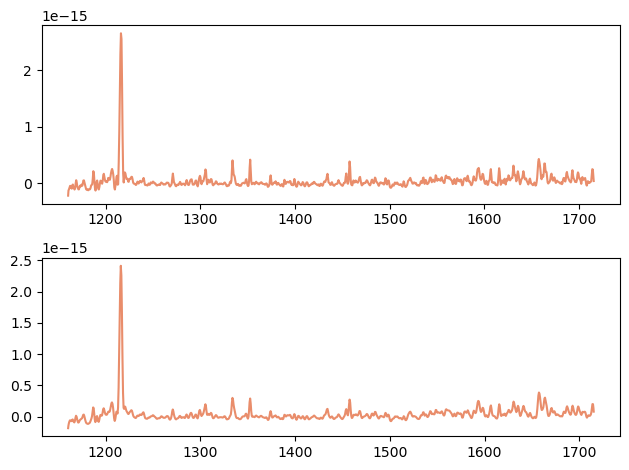

In [139]:
# Plot
fig, ax = plt.subplots(2, 1)
ax[0].plot(hd_wavelength_data, hd_flux_data, color = hd_palette[0])

# Perform smoothing
hd_wavelength_data, hd_flux_data, hd_error_data = smooth_data(hd_wavelength_data, hd_flux_data, hd_error_data, 1)

ax[1].plot(hd_wavelength_data, hd_flux_data, color = hd_palette[0])

plt.tight_layout()
plt.show()

## CII

#### Tau Ceti

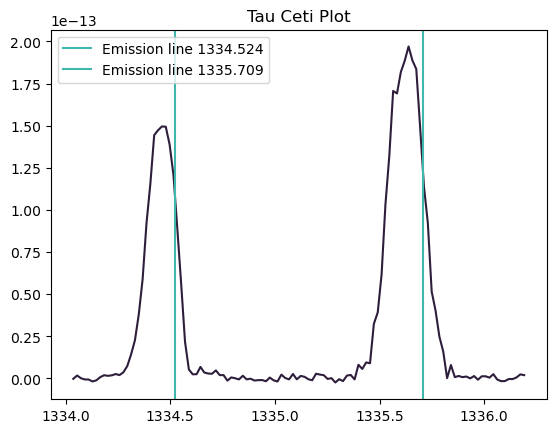

In [134]:
# Set bounds
peak_width = 0.5
wavelength_1 = 1334.524
wavelength_2 = 1335.709
wavelength_mask = (tc_wavelength_data > wavelength_1 - peak_width) & (tc_wavelength_data < wavelength_2 + peak_width) 

# Plot
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask], color = tc_palette[0])
plt.axvline(x = wavelength_1, color = tc_palette[4], label = f'Emission line {wavelength_1}')
plt.axvline(x = wavelength_2, color = tc_palette[4], label = f'Emission line {wavelength_2}')
plt.title('Tau Ceti Plot')
plt.legend()
plt.show()

In [129]:
# Initialize voigt fit 
voigt_model = Voigt1D()
lmfit_model = Model(voigt_fit)

# Set initial parameter values
num_peaks = 2
params = Parameters()
init_amp = np.max(tc_flux_data[wavelength_mask])
init_x0 = [wavelength_1, wavelength_2]
init_fwhm_g = 0.2
init_fwhm_l = 0.2

# Add parameters for each peak
for i in range(num_peaks):
    params.add(f'amplitude_{i}', value=init_amp)
    params.add(f'x_0_{i}', value=init_x0[i])
    params.add(f'fwhm_L_{i}', value=init_fwhm_l)
    params.add(f'fwhm_G_{i}', value=init_fwhm_g)
params.add('num_peaks', value=num_peaks, vary=False)

# Fit the model to the data
result = lmfit_model.fit(tc_flux_data[wavelength_mask], params=params, x=tc_wavelength_data[wavelength_mask])
print(result.fit_report())

[[Model]]
    Model(voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 12522
    # data points      = 118
    # variables        = 8
    chi-square         = 2.9612e-27
    reduced chi-square = 2.6920e-29
    Akaike info crit   = -7754.87837
    Bayesian info crit = -7732.71289
    R-squared          = 1.00000000
[[Variables]]
    amplitude_0:  8.9056e-09 +/- 5.4444e-05 (611350.20%) (init = 1.970437e-13)
    x_0_0:        1334.45783 +/- 0.00119813 (0.00%) (init = 1334.524)
    fwhm_L_0:     1.8507e-06 +/- 0.01134311 (612908.48%) (init = 0.2)
    fwhm_G_0:     0.15180086 +/- 0.00803479 (5.29%) (init = 0.2)
    amplitude_1:  1.4402e-08 +/- 7.9545e-05 (552326.21%) (init = 1.970437e-13)
    x_0_1:        1335.62692 +/- 0.00104727 (0.00%) (init = 1335.709)
    fwhm_L_1:     1.7943e-06 +/- 0.00993566 (553733.71%) (init = 0.2)
    fwhm_G_1:     0.18775311 +/- 0.00703836 (3.75%) (init = 0.2)
    num_peaks:    2 (fixed)
[[Correlations]] (unreported correlati

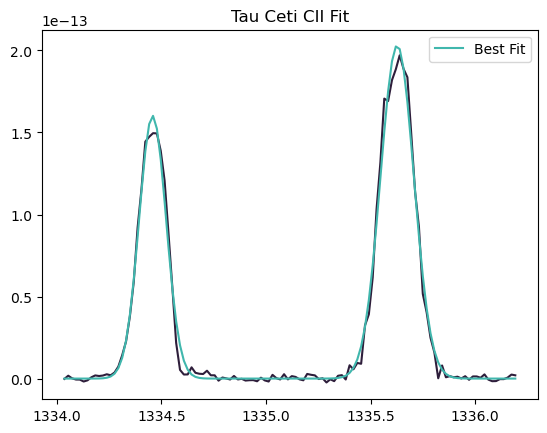

In [133]:
# Plot the results
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask], color = tc_palette[0])
plt.plot(tc_wavelength_data[wavelength_mask], result.best_fit, color = tc_palette[4], label='Best Fit')
plt.title('Tau Ceti CII Fit')
plt.legend()
plt.show()

In [135]:
# Integrate under the line
w0,w1 = wavelength_edges(tc_wavelength_data[wavelength_mask])
tc_voigt = result.best_fit
continuum = [min(tc_voigt) for _ in range(len(tc_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(tc_voigt*(w1-w0)) 

continuum_sumflux = np.sum(continuum*(w1-w0))
tc_total_flux = total_sumflux - continuum_sumflux
print(f'Tau Ceti CII Flux: {tc_total_flux}')

Tau Ceti CII Flux: 6.648046118452764e-14


#### HD-191939

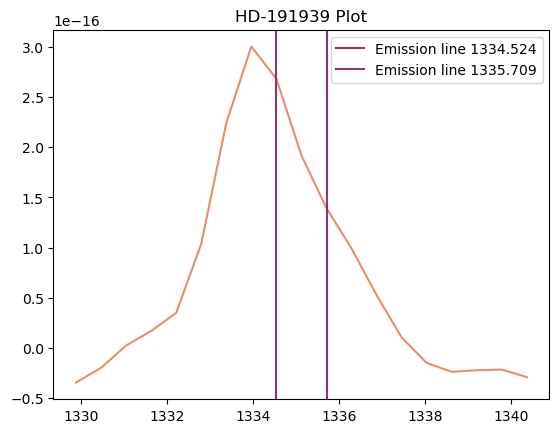

In [142]:
# Set bounds
peak_width = 5.0
wavelength_1 = 1334.524
wavelength_2 = 1335.709
wavelength_mask = (hd_wavelength_data > wavelength_1 - peak_width) & (hd_wavelength_data < wavelength_2 + peak_width) 

# Plot
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], color = hd_palette[0])
plt.axvline(x = wavelength_1, color = hd_palette[4], label = f'Emission line {wavelength_1}')
plt.axvline(x = wavelength_2, color = hd_palette[4], label = f'Emission line {wavelength_2}')
plt.title('HD-191939 Plot')
plt.legend()
plt.show()

In [143]:
# Initialize voigt fit 
voigt_model = Voigt1D()
lmfit_model = Model(voigt_fit)

# Set initial parameter values
num_peaks = 2
params = Parameters()
init_amp = np.max(hd_flux_data[wavelength_mask])
init_x0 = [wavelength_1, wavelength_2]
init_fwhm_g = 0.2
init_fwhm_l = 0.2

# Add parameters for each peak
for i in range(num_peaks):
    params.add(f'amplitude_{i}', value=init_amp)
    params.add(f'x_0_{i}', value=init_x0[i])
    params.add(f'fwhm_L_{i}', value=init_fwhm_l)
    params.add(f'fwhm_G_{i}', value=init_fwhm_g)
params.add('num_peaks', value=num_peaks, vary=False)

# Fit the model to the data
result = lmfit_model.fit(hd_flux_data[wavelength_mask], params=params, x=hd_wavelength_data[wavelength_mask])
print(result.fit_report())

[[Model]]
    Model(voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 10
    # data points      = 19
    # variables        = 8
    chi-square         = 1.8852e-31
    reduced chi-square = 1.7139e-32
    Akaike info crit   = -1384.11987
    Bayesian info crit = -1376.56436
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    amplitude_0:  at initial value
    x_0_0:        at initial value
    fwhm_L_0:     at initial value
    fwhm_G_0:     at initial value
    amplitude_1:  at initial value
    x_0_1:        at initial value
    fwhm_L_1:     at initial value
    fwhm_G_1:     at initial value
[[Variables]]
    amplitude_0:  4.1509e-16 (init = 3.00388e-16)
    x_0_0:        1334.52400 (init = 1334.524)
    fwhm_L_0:     0.20000000 (init = 0.2)
    fwhm_G_0:     0.20000000 (init = 0.2)
    amplitude_1:  2.1243e-16 (init = 3.00388e-16)
    x_0_1:        1335.70900 (init = 1335.709)
    fwhm_L_1:     0.20000000 

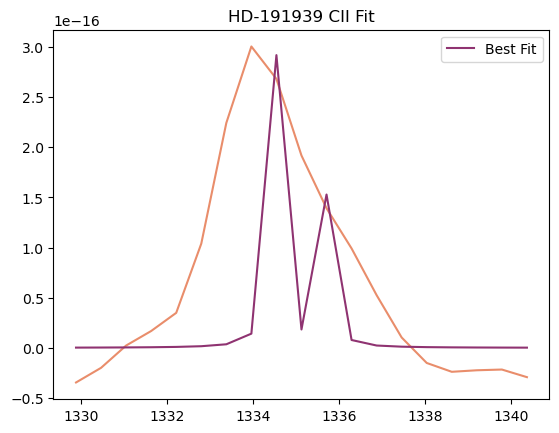

In [144]:
# Plot the results
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], color = hd_palette[0])
plt.plot(hd_wavelength_data[wavelength_mask], result.best_fit, color = hd_palette[4], label='Best Fit')
plt.title('HD-191939 CII Fit')
plt.legend()
plt.show()

In [36]:
# Integrate under the line
w0,w1 = wavelength_edges(hd_wavelength_data[wavelength_mask])
hd_voigt = result.best_fit
continuum = [min(hd_voigt) for _ in range(len(hd_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(hd_voigt*(w1-w0)) 

continuum_sumflux = np.sum(continuum*(w1-w0))
hd_total_flux = total_sumflux - continuum_sumflux
print(f'HD-191939 Flux: {hd_total_flux}')

HD-191939 Flux: 8.23134917063394e-16


In [37]:
print("Best fit parameters:")
for name, value in result.best_values.items():
    print(f"{name}: {value}")

Best fit parameters:
amplitude_0: 1.366556090825561e-15
x_0_0: 1334.0
fwhm_L_0: 0.2
fwhm_G_0: 0.2
amplitude_1: 1.2162270969679234e-15
x_0_1: 1336.0
fwhm_L_1: 0.2
fwhm_G_1: 0.2


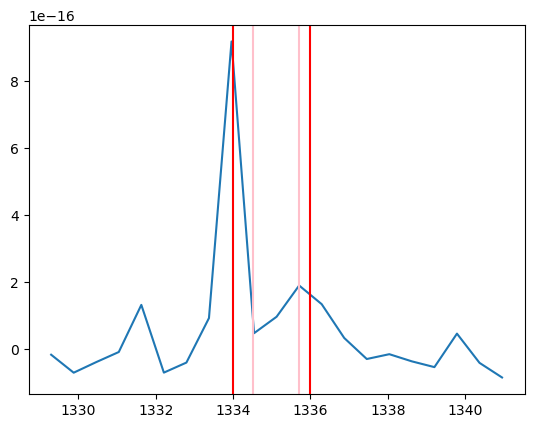

In [38]:
# Radial velocity
emission_lines = [1334.524, 1335.709]
best_emission_lines = [1334.0, 1336.0]

plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])
plt.axvline(x = emission_lines[0], color = 'pink')
plt.axvline(x = emission_lines[1], color = 'pink')
plt.axvline(x = best_emission_lines[0], color = 'red')
plt.axvline(x = best_emission_lines[1], color = 'red')
plt.show()

In [39]:
# Iterate through that group
dv = []
for i, rest_wavelength in enumerate(emission_lines):
    u_rest_lam = rest_wavelength * u.AA
    u_obs_lam = best_emission_lines[i] * u.AA
    dv.append(u_obs_lam.to(u.km/u.s,  equivalencies=u.doppler_optical(u_rest_lam)))
doppler_shift = sum(dv)/len(dv)
doppler_shift

<Quantity -26.19999304 km / s>

#### Comparison

In [40]:
print(f"Ratio T-H: {tc_total_flux/hd_total_flux}")

Ratio T-H: 80.76496307762342


## Fe XXI

#### Tau Ceti

In [41]:
peak_width = 0.5
wavelength_1 = 1354.080	
wavelength_2 = 1354.080
wavelength_mask = (tc_wavelength_data > wavelength_1 - peak_width) & (tc_wavelength_data < wavelength_2 + peak_width) 

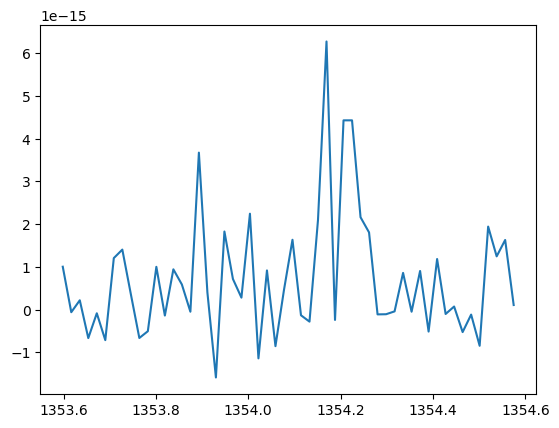

In [42]:
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask])
plt.show()

[[Model]]
    Model(single_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 104
    # data points      = 54
    # variables        = 4
    chi-square         = 8.1741e-29
    reduced chi-square = 1.6348e-30
    Akaike info crit   = -3699.80126
    Bayesian info crit = -3691.84532
    R-squared          = 1.00000000
[[Variables]]
    amplitude:  6.1169e-15 +/- 8.6163e-15 (140.86%) (init = 6.278002e-15)
    x_0:        1354.20144 +/- 0.01133124 (0.00%) (init = 1354.08)
    fwhm_L:     0.05325441 +/- 0.08838843 (165.97%) (init = 0.2)
    fwhm_G:     0.07152758 +/- 0.08856407 (123.82%) (init = 0.2)
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, fwhm_L) = -0.9909
    C(amplitude, fwhm_G) = +0.9396
    C(fwhm_L, fwhm_G)    = -0.9221


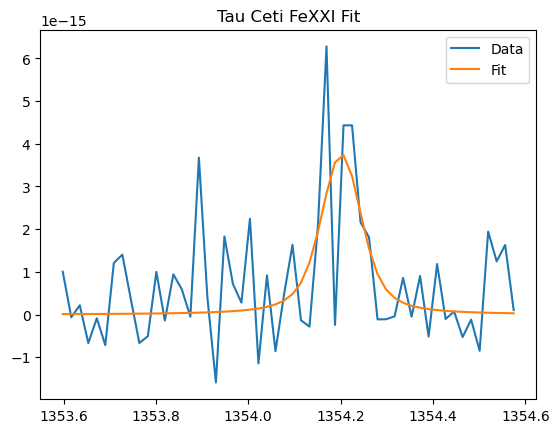

In [43]:
voigt_model = Voigt1D()
lmfit_model = Model(single_voigt_fit)

# Set initial parameter values
init_amp = np.max(tc_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2

params_single = lmfit_model.make_params(amplitude=init_amp, x_0=init_x0, fwhm_L=init_fwhm_l, fwhm_G=init_fwhm_g)
    
# Fit the model to the data
result = lmfit_model.fit(tc_flux_data[wavelength_mask], params=params_single, x=tc_wavelength_data[wavelength_mask])

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(tc_wavelength_data[wavelength_mask], tc_flux_data[wavelength_mask], label='Data')
plt.plot(tc_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('Tau Ceti FeXXI Fit')
plt.legend()
plt.show()


In [44]:
tc_flux_data[wavelength_mask]

array([ 1.00473238e-15, -6.04584098e-17,  2.18816330e-16, -6.66149896e-16,
       -8.56116780e-17, -7.14428885e-16,  1.20674257e-15,  1.40538449e-15,
        3.64410112e-16, -6.63943891e-16, -5.05417316e-16,  1.00197940e-15,
       -1.39022201e-16,  9.43647177e-16,  5.88644028e-16, -4.90900585e-17,
        3.67588141e-15,  4.02572865e-16, -1.58847097e-15,  1.82878517e-15,
        7.17747594e-16,  2.80781142e-16,  2.24591720e-15, -1.14119828e-15,
        9.17578980e-16, -8.55298799e-16,  4.59752971e-16,  1.63539526e-15,
       -1.32226431e-16, -2.80937195e-16,  2.10190275e-15,  6.27800233e-15,
       -2.41139234e-16,  4.43155113e-15,  4.43176109e-15,  2.16305068e-15,
        1.80818356e-15, -1.11232772e-16, -1.07856002e-16, -4.10554338e-17,
        8.60144565e-16, -4.90448086e-17,  9.05370283e-16, -5.13660220e-16,
        1.18482546e-15, -1.02015858e-16,  7.25498983e-17, -5.25777082e-16,
       -1.16382745e-16, -8.46275712e-16,  1.94463165e-15,  1.24747553e-15,
        1.63089422e-15,  

In [45]:
# Integrate under the line
w0,w1 = wavelength_edges(tc_wavelength_data[wavelength_mask])
tc_voigt = result.best_fit
continuum = [min(tc_voigt) for _ in range(len(tc_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(tc_flux_data[wavelength_mask]*(w1-w0)) # maybe replace with tc_flux_data[wavelength_mask]

continuum_sumflux = np.sum(continuum*(w1-w0))
tc_total_flux = total_sumflux - continuum_sumflux
print(f'Tau Ceti CII Flux: {tc_total_flux}')

Tau Ceti CII Flux: 6.978027299164912e-16


#### HD-191939

In [56]:
peak_width = 5
wavelength_1 = 1353
wavelength_2 = 1353
wavelength_mask = (hd_wavelength_data > wavelength_1 - peak_width) & (hd_wavelength_data < wavelength_2 + peak_width) 

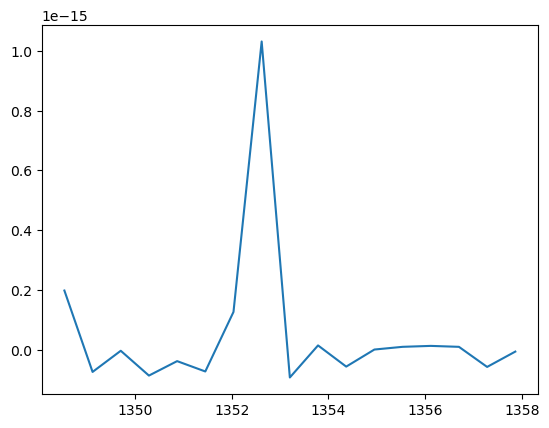

In [57]:
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask])
plt.show()

[[Model]]
    Model(single_voigt_fit)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 1000
    # data points      = 17
    # variables        = 4
    chi-square         = 7.5198e-32
    reduced chi-square = 5.7845e-33
    Akaike info crit   = -1258.47271
    Bayesian info crit = -1255.13985
    R-squared          = 1.00000000
##  Warning: uncertainties could not be estimated:
    amplitude:  at initial value
[[Variables]]
    amplitude:  2.3619e-14 (init = 1.030697e-15)
    x_0:        1352.45482 (init = 1353)
    fwhm_L:     0.01942986 (init = 0.2)
    fwhm_G:     0.42436175 (init = 0.2)


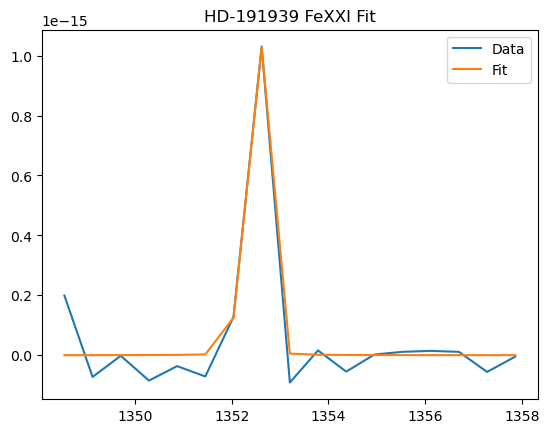

In [61]:
voigt_model = Voigt1D()
lmfit_model = Model(single_voigt_fit)

# Set initial parameter values
init_amp = np.max(hd_flux_data[wavelength_mask]) 
init_x0 = wavelength_1
init_fwhm_g = 0.2
init_fwhm_l = 0.2

params_single = lmfit_model.make_params(amplitude=init_amp, x_0=init_x0, fwhm_L=init_fwhm_l, fwhm_G=init_fwhm_g)
    
# Fit the model to the data
result = lmfit_model.fit(hd_flux_data[wavelength_mask], params=params_single, x=hd_wavelength_data[wavelength_mask], max_nfev=1000)

# Print fit report
print(result.fit_report())

# Plot the results
plt.plot(hd_wavelength_data[wavelength_mask], hd_flux_data[wavelength_mask], label='Data')
plt.plot(hd_wavelength_data[wavelength_mask], result.best_fit, label='Fit')
plt.title('HD-191939 FeXXI Fit')
plt.legend()
plt.show()


In [49]:
# Integrate under the line
w0,w1 = wavelength_edges(hd_wavelength_data[wavelength_mask])
hd_voigt = result.best_fit
continuum = [min(hd_voigt) for _ in range(len(hd_wavelength_data[wavelength_mask]))]
total_sumflux = np.sum(result.best_fit*(w1-w0)) # maybe replace with tc_flux_data[wavelength_mask]

continuum_sumflux = np.sum(continuum*(w1-w0))
hd_total_flux = total_sumflux - continuum_sumflux
print(f'HD-191939 FeXXI Flux: {hd_total_flux}')

HD-191939 FeXXI Flux: 4.7e-322


#### Comparison

In [50]:
print(f"Ratio T-H: {tc_total_flux/hd_total_flux}")

Ratio T-H: 1.4867036305167422e+306


In [51]:
print(f"Ratio T-H: {(1.467025e-14)/(7.999070e-16)}")

Ratio T-H: 18.339944518550283


In [54]:
peak_width = 0.5
wavelength_1 = 1334.5
wavelength_2 = 1335.5
wavelength_mask = (tc_wavelength_data > wavelength_1 - peak_width) & (tc_wavelength_data < wavelength_2 + peak_width) 